In [62]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input
from keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import pathlib
import os
import cv2
from PIL import Image
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import shutil
import math
from PIL import Image



In [63]:
data_train_dir = "/kaggle/input/dataem/fer2013/train/"
data_test_dir = "/kaggle/input/dataem/fer2013/test/"
augmented_data_dir = "/kaggle/working/augmented_train/"



In [64]:
# Convert to pathlib paths
data_train_dir = pathlib.Path(data_train_dir)
augmented_data_dir = pathlib.Path(augmented_data_dir)

In [65]:
data_train_dir

PosixPath('/kaggle/input/dataem/fer2013/train')

In [66]:
# Function to clear the augmented data directory
def clear_augmented_data_directory(directory):
    if directory.exists() and directory.is_dir():
        shutil.rmtree(directory)
    os.makedirs(directory, exist_ok=True)

# Clear augmented data directory
clear_augmented_data_directory(augmented_data_dir)

In [67]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import pathlib
import os
import cv2
from PIL import Image
import numpy as np
import random

# Define the augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,    # Random rotation degrees (simulates different facial angles)
    width_shift_range=0.2,  # Random horizontal shift (simulates slight angle changes)
    height_shift_range=0.2,  # Random vertical shift (simulates slight angle changes)
    shear_range=0.2,      # Shear angle (simulates different perspectives)
    zoom_range=0.2,       # Random zoom (simulates different distances)
    horizontal_flip=True,  # Random horizontal flip (mirrors the face)
    fill_mode='nearest',  # Fill mode
    brightness_range=[0.8, 1.2]  # Adjusts brightness (simulates different lighting conditions)
)

# Define directories
data_train_dir = "/kaggle/input/dataem/fer2013/train/"
augmented_data_dir = "/kaggle/working/augmented_train/"

# Convert to pathlib paths
data_train_dir = pathlib.Path(data_train_dir)
augmented_data_dir = pathlib.Path(augmented_data_dir)

# Create augmented data directory if it doesn't exist
os.makedirs(augmented_data_dir, exist_ok=True)

# Define emotion label dictionary
emotion_label_dict = {
    'angry': 7,
    'disgust': 100,
    'fear': 2,
    'happy': 3,
    'neutral': 4,
    'sad': 5,
    'surprise': 6
}

# Create dictionaries to hold image paths
emotion_images_train_dict = {
    'angry': list(data_train_dir.glob('anger/*')),
    'disgust': list(data_train_dir.glob('disgust/*')),
    'fear': list(data_train_dir.glob('fear/*')),
    'happy': list(data_train_dir.glob('happy/*')),
    'neutral': list(data_train_dir.glob('neutral/*')),
    'sad': list(data_train_dir.glob('sad/*')),
    'surprise': list(data_train_dir.glob('surprise/*'))
}

# Define the number of augmentations for each class
augmentations_per_image = {
    'angry': 7,
    'disgust':33,
    'fear': 29,
    'happy': 2,
    'neutral': 1,
    'sad': 5,
    'surprise': 4
}

# Function to save augmented images
def save_augmented_images(category, images, augmentations_per_image):
    category_path = augmented_data_dir / category
    os.makedirs(category_path, exist_ok=True)
    
    for i, img_path in enumerate(images):
        img = cv2.imread(str(img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert image to RGB
        x = img_to_array(img)  # Convert image to array
        x = np.expand_dims(x, axis=0)  # Expand dimensions to match input shape
        
        # Generate a set of unique augmented images
        generated_images = set()
        while len(generated_images) < augmentations_per_image:
            batch = next(datagen.flow(x, batch_size=1))
            augmented_img = batch[0].astype("uint8")
            augmented_img_tuple = tuple(augmented_img.flatten())
            
            # Ensure uniqueness
            if augmented_img_tuple not in generated_images:
                generated_images.add(augmented_img_tuple)
                augmented_img_pil = Image.fromarray(augmented_img)
                augmented_img_pil.save(category_path / f"augmented_{i}_{len(generated_images)}.jpg")

# Apply augmentation and save images for each category
for emotion_name, images in emotion_images_train_dict.items():
    save_augmented_images(emotion_name, images, augmentations_per_image=augmentations_per_image[emotion_name])

print("Data augmentation completed and images saved.")


Data augmentation completed and images saved.


In [68]:
import pathlib
data_train_dir = pathlib.Path(data_train_dir)
data_train_dir
augmented_data_dir = pathlib.Path(augmented_data_dir)
data_test_dir = pathlib.Path(data_test_dir)
data_test_dir

PosixPath('/kaggle/input/dataem/fer2013/test')

In [69]:
len(list(data_train_dir.glob('happy/*')))
#len(list(augmented_data_dir.glob('happy/*')))

7528

In [70]:
emotion_images_train_dict = {
    'angry': list(data_train_dir.glob('anger/*')),
    'disgust': list(data_train_dir.glob('disgust/*')),
    'fear': list(data_train_dir.glob('fear/*')),
    'happy': list(data_train_dir.glob('happy/*')),
    'neutral': list(data_train_dir.glob('neutral/*')),
    'sad': list(data_train_dir.glob('sad/*')),
    'surprise': list(data_train_dir.glob('surprise/*'))
    
}

emotion_images_train_aug_dict = {
    'angry': list(augmented_data_dir.glob('anger/*')),
    'disgust': list(augmented_data_dir.glob('disgust/*')),
    'fear': list(augmented_data_dir.glob('fear/*')),
    'happy': list(augmented_data_dir.glob('happy/*')),
    'neutral': list(augmented_data_dir.glob('neutral/*')),
    'sad': list(augmented_data_dir.glob('sad/*')),
    'surprise': list(augmented_data_dir.glob('surprise/*'))
    
}

emotion_images_test_dict = {
    'angry': list(data_test_dir.glob('anger/*')),
    'disgust': list(data_test_dir.glob('disgust/*')),
    'fear': list(data_test_dir.glob('fear/*')),
    'happy': list(data_test_dir.glob('happy/*')),
    'neutral': list(data_test_dir.glob('neutral/*')),
    'sad': list(data_test_dir.glob('sad/*')),
    'surprise': list(data_test_dir.glob('surprise/*'))
    
}

In [71]:
emotion_label_dict = {
    'angry': 0,
    'disgust': 1,
    'fear': 2,
    'happy': 3,
    'neutral': 4,
    'sad':5,
    'surprise':6
    
}

In [73]:
X_train, y_train = [], []

for emotion_name, images in emotion_images_train_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        img = cv2.resize(img, (48, 48))
        X_train.append(img)
        y_train.append(emotion_label_dict[emotion_name])
        


for emotion_name, images in emotion_images_train_aug_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        img = cv2.resize(img,(48, 48))
        X_train.append(img)
        y_train.append(emotion_label_dict[emotion_name])


        
X_test, y_test = [], []

for emotion_name, images in emotion_images_test_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        img = cv2.resize(img, (48, 48))
        X_test.append(img)
        y_test.append(emotion_label_dict[emotion_name])

In [74]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
print(len(X_train))

110614


In [75]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255


In [76]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Add, GlobalAveragePooling2D, Multiply, Activation

# Convert labels to one-hot encoded format
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train, num_classes=7)
y_test_categorical = to_categorical(y_test, num_classes=7)

# Residual Block
def residual_block(x, filters, kernel_size=(3, 3), strides=(1, 1), activation='relu'):
    shortcut = Conv2D(filters, (1, 1), strides=strides, padding='same')(x)  # Adjust shortcut to match filter size
    x = Conv2D(filters, kernel_size, padding='same', strides=strides)(x)
    x = BatchNormalization()(x)
    x = Activation(activation)(x)
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([x, shortcut])
    x = Activation(activation)(x)
    return x

# Attention Mechanism
def attention_block(x, filters):
    f = Conv2D(filters, (1, 1))(x)
    g = Conv2D(filters, (1, 1))(x)
    h = Conv2D(filters, (1, 1))(x)
    s = Multiply()([g, h])
    s = Conv2D(filters, (1, 1))(s)
    x = Add()([f, s])
    x = Activation('relu')(x)
    return x

# Multi-scale Feature Extraction
def multi_scale_feature(x):
    scale_1 = Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu')(x)
    scale_2 = Conv2D(128, kernel_size=(5, 5), padding='same', activation='relu')(x)
    scale_3 = Conv2D(128, kernel_size=(7, 7), padding='same', activation='relu')(x)
    x = Add()([scale_1, scale_2, scale_3])
    return x

# Input layer
input_layer = Input(shape=(48, 48, 3))

# Initial Convolution Block
x = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(input_layer)
x = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

# Residual Block
x = residual_block(x, 128)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Attention Mechanism
x = attention_block(x, 128)

# Second Residual Block
x = residual_block(x, 128)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

# Multi-scale feature extraction
x = multi_scale_feature(x)

# Flatten and Fully Connected Layers
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(7, activation='softmax')(x)

# Create model
emotion_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Model summary
emotion_model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_45 (Conv2D)  │ (None, 48, 48,    │        896 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_46 (Conv2D)  │ (None, 48, 48,    │     18,496 │ conv2d_45[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 24, 24,    │          0 │ conv2d_46[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 24, 24,    │          0 │ max_pooling2d_9[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_48 (Conv2D)  │ (None, 24, 24,    │     73,856 │ dropout_9[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 24, 24,    │        512 │ conv2d_48[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_15       │ (None, 24, 24,    │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_49 (Conv2D)  │ (None, 24, 24,    │    147,584 │ activation_15[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 24, 24,    │        512 │ conv2d_49[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_47 (Conv2D)  │ (None, 24, 24,    │      8,320 │ dropout_9[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_12 (Add)        │ (None, 24, 24,    │          0 │ batch_normalizat… │
│                     │ 128)              │            │ conv2d_47[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_16       │ (None, 24, 24,    │          0 │ add_12[0][0]      │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_10    │ (None, 12, 12,    │          0 │ activation_16[0]… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_51 (Conv2D)  │ (None, 12, 12,    │     16,512 │ max_pooling2d_10… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_52 (Conv2D)  │ (None, 12, 12,    │     16,512 │ max_pooling2d_10… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_3          │ (None, 12, 12,    │          0 │ conv2d_51[0][0],

 Total params: 6,715,975 (25.62 MB)

 Trainable params: 6,714,951 (25.62 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [77]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
import os

# Define the number of epochs and batch size
epochs = 50
batch_size = 16

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model
history = emotion_model.fit(
    X_train_scaled, 
    y_train_categorical, 
    epochs=epochs, 
    batch_size=batch_size, 
    validation_data=(X_test_scaled, y_test_categorical),
    callbacks=[reduce_lr],
    verbose=1
)

# Create the models directory in the output folder
models_dir = "/kaggle/working/models/"
os.makedirs(models_dir, exist_ok=True)

# Save the model
model_save_path = os.path.join(models_dir, "emotion_model.h5")
emotion_model.save(model_save_path)

print(f"Model saved to {model_save_path}")


Epoch 1/50
   7/6914 ━━━━━━━━━━━━━━━━━━━━ 2:18 20ms/step - accuracy: 0.1586 - loss: 5.6173  

I0000 00:00:1722479107.539106     103 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1722479107.578261     103 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


6914/6914 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2424 - loss: 1.8894

W0000 00:00:1722479200.784775     103 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722479202.431447     102 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


6914/6914 ━━━━━━━━━━━━━━━━━━━━ 121s 14ms/step - accuracy: 0.2424 - loss: 1.8893 - val_accuracy: 0.5793 - val_loss: 1.1964 - learning_rate: 1.0000e-04
Epoch 2/50
  11/6914 ━━━━━━━━━━━━━━━━━━━━ 1:24 12ms/step - accuracy: 0.5391 - loss: 1.1853

W0000 00:00:1722479206.171369     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


6914/6914 ━━━━━━━━━━━━━━━━━━━━ 85s 12ms/step - accuracy: 0.5436 - loss: 1.1880 - val_accuracy: 0.7155 - val_loss: 0.7858 - learning_rate: 1.0000e-04
Epoch 3/50
6914/6914 ━━━━━━━━━━━━━━━━━━━━ 85s 12ms/step - accuracy: 0.6782 - loss: 0.8587 - val_accuracy: 0.7448 - val_loss: 0.6747 - learning_rate: 1.0000e-04
Epoch 4/50
6914/6914 ━━━━━━━━━━━━━━━━━━━━ 85s 12ms/step - accuracy: 0.7391 - loss: 0.6992 - val_accuracy: 0.7591 - val_loss: 0.6370 - learning_rate: 1.0000e-04
Epoch 5/50
6914/6914 ━━━━━━━━━━━━━━━━━━━━ 85s 12ms/step - accuracy: 0.7774 - loss: 0.5868 - val_accuracy: 0.7713 - val_loss: 0.6150 - learning_rate: 1.0000e-04
Epoch 6/50
6914/6914 ━━━━━━━━━━━━━━━━━━━━ 85s 12ms/step - accuracy: 0.8075 - loss: 0.5121 - val_accuracy: 0.7833 - val_loss: 0.5853 - learning_rate: 1.0000e-04
Epoch 7/50
6914/6914 ━━━━━━━━━━━━━━━━━━━━ 85s 12ms/step - accuracy: 0.8316 - loss: 0.4457 - val_accuracy: 0.7858 - val_loss: 0.5873 - learning_rate: 1.0000e-04
Epoch 8/50
6914/6914 ━━━━━━━━━━━━━━━━━━━━ 85s 12ms/

In [83]:
# Save model structure in a JSON file
model_json = emotion_model.to_json()
model_json_path = os.path.join(models_dir, "emotion_model.json")
with open(model_json_path, "w") as json_file:
    json_file.write(model_json)

# Save trained model weights in an H5 file
model_weights_path = os.path.join(models_dir, 'emotion_model.weights.h5')
emotion_model.save_weights(model_weights_path)

print(f"Model structure saved to {model_json_path}")
print(f"Model weights saved to {model_weights_path}")

Model structure saved to /kaggle/working/models/emotion_model.json
Model weights saved to /kaggle/working/models/emotion_model.weights.h5


In [84]:
# Evaluate the model
loss, accuracy = emotion_model.evaluate(X_test_scaled, y_test_categorical)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8110 - loss: 1.1161
Test Loss: 0.9777730703353882
Test Accuracy: 0.8162599205970764


In [80]:
# Evaluate the model
y_pred = emotion_model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print('Classification Report:')
print(classification_report(y_test, y_pred_classes, target_names=emotion_label_dict.keys()))




 36/221 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

W0000 00:00:1722483495.818222     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


W0000 00:00:1722483497.721100     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Accuracy: 0.8162599318955732
Precision: 0.8141856348934684
Recall: 0.8162599318955732
F1-score: 0.8150533557596075
Classification Report:
              precision    recall  f1-score   support

       angry       0.76      0.76      0.76       644
     disgust       0.65      0.56      0.60        57
        fear       0.64      0.59      0.61       167
       happy       0.89      0.91      0.90      1827
     neutral       0.83      0.84      0.83      2597
         sad       0.67      0.63      0.65       856
    surprise       0.84      0.85      0.85       900

    accuracy                           0.82      7048
   macro avg       0.75      0.73      0.74      7048
weighted avg       0.81      0.82      0.82      7048



In [81]:
# Evaluate the model
y_pred = emotion_model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print('Classification Report:')
print(classification_report(y_test, y_pred_classes, target_names=emotion_label_dict.keys()))


221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Accuracy: 0.8162599318955732
Precision: 0.8141856348934684
Recall: 0.8162599318955732
F1-score: 0.8150533557596075
Classification Report:
              precision    recall  f1-score   support

       angry       0.76      0.76      0.76       644
     disgust       0.65      0.56      0.60        57
        fear       0.64      0.59      0.61       167
       happy       0.89      0.91      0.90      1827
     neutral       0.83      0.84      0.83      2597
         sad       0.67      0.63      0.65       856
    surprise       0.84      0.85      0.85       900

    accuracy                           0.82      7048
   macro avg       0.75      0.73      0.74      7048
weighted avg       0.81      0.82      0.82      7048



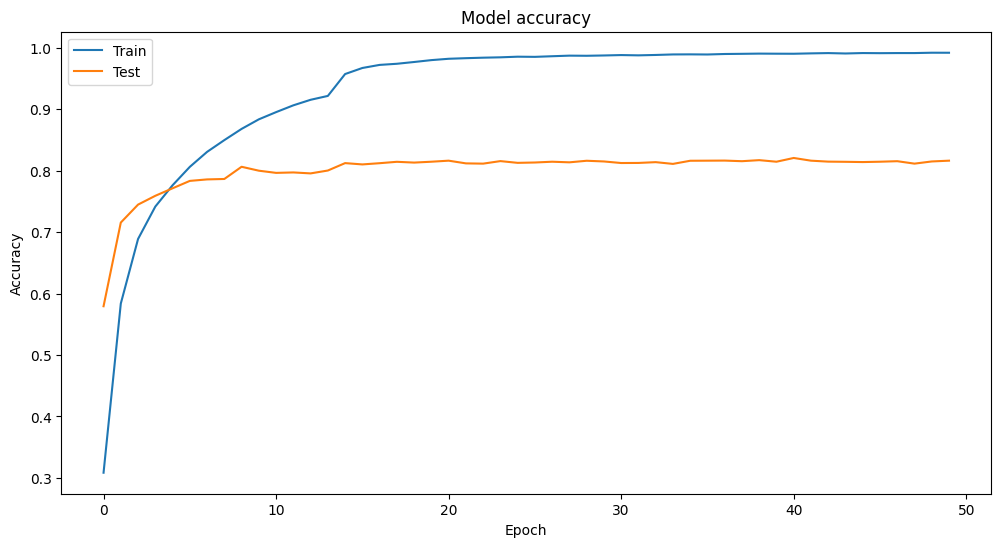

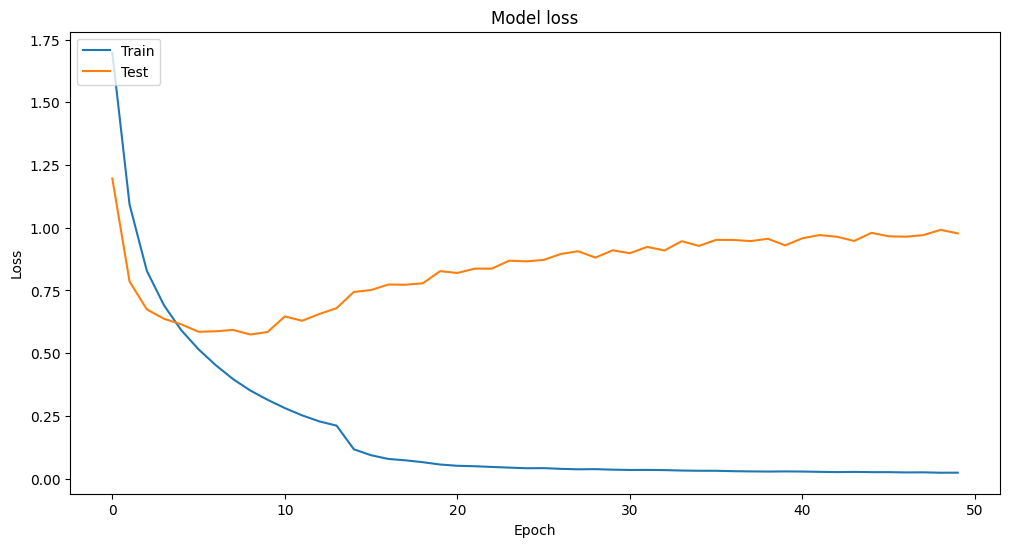

221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


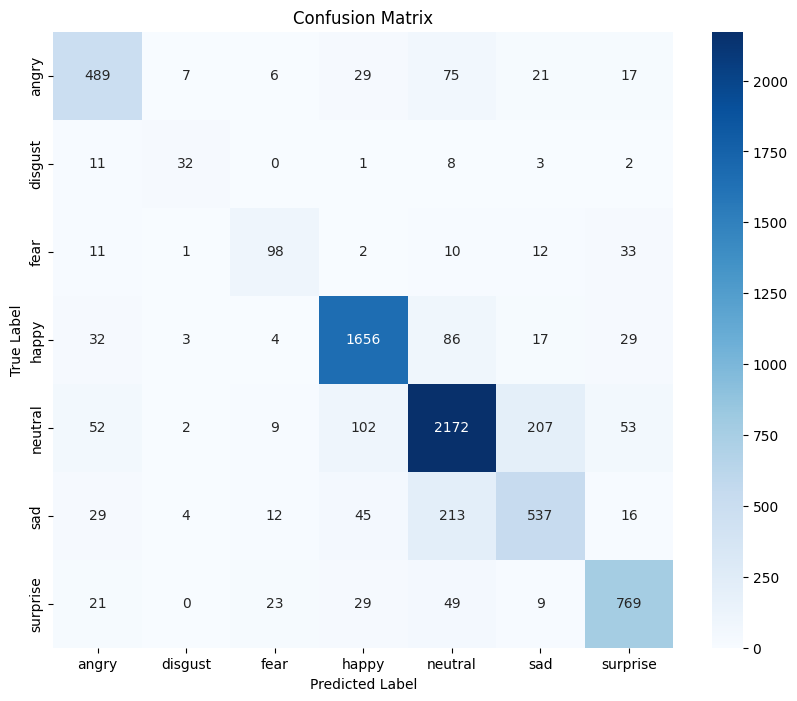

In [82]:

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Predict classes for the test set
y_pred = emotion_model.predict(X_test_scaled)
y_pred_classes = y_pred.argmax(axis=-1)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_label_dict.keys(), yticklabels=emotion_label_dict.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
